# 0. Preparation

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
# parameters
a0 = 3
b0 =0.1

xx0 = np.array([10,11,12,20,21,22])
yy0 = np.array([4.0,3.8,3.6,5.2,4.9,4.8])

In [3]:
# functions
def calc_chi2(yy,a,b):
    chi2val = sum((yy - (a + b*xx0))**2 / 1)
    return chi2val

def chi2prob(chi2val,ndf):
    return 1 - chi2.cdf(chi2val, ndf)

def sl_MLE(xx,yy):
    xy = xx * yy
    xx2 = xx * xx
    mean_x = np.mean(xx)
    mean_y = np.mean(yy)
    mean_x2 = np.mean(xx2)
    mean_xy = np.mean(xy)
    b = (mean_xy - mean_x*mean_y) / (mean_x2 - mean_x**2)
    a = mean_y - b*mean_x
    return (a,b)

# 1. Measured values

In [4]:
## 1. Original data
print ("pre-fit chi2 and p-value with original data:")
chi20 = calc_chi2(yy0,a0,b0)
pval0 = chi2prob(chi20,len(xx0))
print(chi20, pval0, "\n")

print("post-fit chi2 and p-value with original data:")
abhat0 = sl_MLE(xx0,yy0)
ahat0 = abhat0[0]
bhat0 = abhat0[1]
chi20post = calc_chi2(yy0,ahat0,bhat0)
pval0post = chi2prob(chi20post,len(xx0)-2)
print(chi20post, pval0post, "\n")

pre-fit chi2 and p-value with original data:
0.6900000000000001 0.9947043391999434 

post-fit chi2 and p-value with original data:
0.3973593073593073 0.9826925338333165 



**Comment**: the $\chi^2$ values are extremely small, leading to unexpectedly large p-values. You can tell here that I made up the "measured" values by hand and that they are not realistic...

# 2. Toy study

In [5]:
## 2. Toy study
# parameter: number of toys to throw
Ntoys = 10000

# initial arrays
chi2pre, pvalpre, chi2post, pvalpost = [], [], [], []

# toys loop
for i in range(0,Ntoys):
    yyt = []
    
    # a. throw the toys
    for j in range(0,len(xx0)):
        yyt.append(np.random.normal(a0+b0*xx0[j],1))

    # b. compute the pre-fit chi2 and p-value
    chi2t_pre = calc_chi2(yyt,a0,b0)
    pvalt_pre = chi2prob(chi2t_pre,len(xx0))
    chi2pre.append(chi2t_pre)
    pvalpre.append(pvalt_pre)

    # c. compute the MLEs
    abhatt = sl_MLE(xx0,yyt)
    ahatt = abhatt[0]
    bhatt = abhatt[1]
    
    # d. compute the post-fit chi2 and p-value
    chi2t_post = calc_chi2(yyt,ahatt,bhatt)
    pvalt_post = chi2prob(chi2t_post,len(xx0)-2)
    chi2post.append(chi2t_post)
    pvalpost.append(pvalt_post)

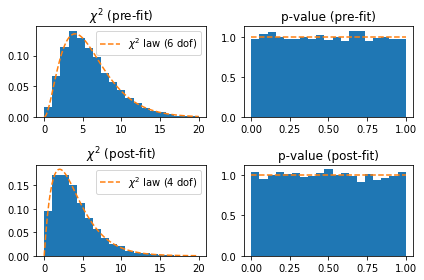

In [10]:
# for plotting: expected distributions for chi2 and pvalues
xchi2 = np.linspace(0,20,100)
ychi2_pre = chi2.pdf(xchi2, len(xx0))
ychi2_post = chi2.pdf(xchi2, len(xx0)-2)
xpval = np.linspace(0,1,100)
ypval = np.full_like(xpval, 1)
    
# draw the results
plt.figure()

plt.subplot(221)
plt.hist(chi2pre, np.linspace(0, 20, 20), density=True)
plt.plot(xchi2, ychi2_pre, '--', label=r'$\chi^2$ law (6 dof)')
plt.title(r'$\chi^2$ (pre-fit)')
plt.legend()

plt.subplot(222)
plt.hist(pvalpre, np.linspace(0, 1, 20), density=True)
plt.plot(xpval, ypval, '--')
plt.title(r'p-value (pre-fit)')

plt.subplot(223)
plt.hist(chi2post, np.linspace(0, 20, 20), density=True)
plt.plot(xchi2, ychi2_post, '--', label=r'$\chi^2$ law (4 dof)')
plt.title(r'$\chi^2$ (post-fit)')
plt.legend()

plt.subplot(224)
plt.hist(pvalpost, np.linspace(0, 1, 20), density=True)
plt.plot(xpval, ypval, '--')
plt.title(r'p-value (post-fit)')

plt.tight_layout()
plt.show()

**Comments:**
* The $\chi^2$ distributions do follow the expected distributions, as reflected in the fact that the p-value distributions are uniform.
* In particular, the "pre-fit" $\chi^2$ (using true values of the parameters) follows a $\chi^2$ law with **6** degrees of freedom (6 data points), while the "post-fit" one (using estimated parameters) follows a $\chi^2$ law with **4** degrees of freedom (6 data points - 2 parameters).
* Both p-value distributions ("pre-fit" and "post-fit") are flat because we have used the correct number of degrees of freedom to estimate them. If we would have used 6 dof in the "post-fit" case, for instance (see below), the "p-value" would not have been flat, showing that the data do not correspond to the hypothesis that we are testing (i.e. a $\chi^2$ with 6 degrees of freedom, since in reality there are only 4).

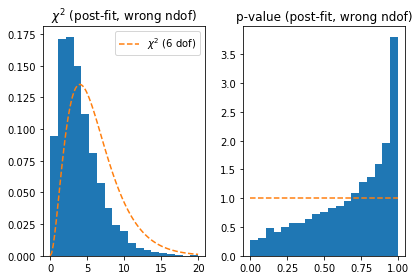

In [11]:
pvalpost_4dof = chi2prob(chi2post, len(xx0)) # wrong number of dof here!

# plotting
plt.subplot(121)
plt.hist(chi2post, np.linspace(0, 20, 20), density=True)
plt.plot(xchi2, ychi2_pre, '--', label=r'$\chi^2$ (6 dof)')
plt.title(r'$\chi^2$ (post-fit, wrong ndof)')
plt.legend()

plt.subplot(122)
plt.hist(pvalpost_4dof, np.linspace(0, 1, 20), density=True)
plt.plot(xpval, ypval, '--')
plt.title(r'p-value (post-fit, wrong ndof)')

plt.tight_layout()
plt.show()